# Topic Modeling

Warning: don't just copy this code, since you'll need to do a lot of parameter-tuning to get this to work with your corpus. 

In [30]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
%matplotlib inline

In [5]:
moonstone = open('../../Texts/moonstone.md').read()
moonstoneTokens = nltk.word_tokenize(moonstone)

In [1]:
def chunk(tokens, size): 
    return list(zip(*[tokens[i::size] for i in range(size)])) 

In [57]:
moonstoneChunks = chunk(moonstoneTokens, 5000)

In [58]:
len(moonstoneChunks)

46

In [59]:
moonstoneChunksJoined = [' '.join(chunk) for chunk in moonstoneChunks]

In [60]:
counts = CountVectorizer(min_df=2, max_df=0.60, stop_words='english', max_features=1000)

In [61]:
countMatrix = counts.fit_transform(moonstoneChunksJoined)

In [62]:
countMatrix

<46x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 14535 stored elements in Compressed Sparse Row format>

In [73]:
lda = LatentDirichletAllocation(n_components=4, learning_method='online')

In [74]:
ldaOut = lda.fit_transform(countMatrix)

In [75]:
wordLabels = counts.get_feature_names()

In [78]:
topicLabels = []
for i, topic in enumerate(lda.components_):
    print("Topic {}".format(i))
    topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
    print(topicLabel)
    topicLabels.append(topicLabel)

Topic 0
godfrey aunt ablewhite dear clack bruff friends marriage precious son
Topic 1
sergeant cuff rosanna spearman letter servants penelope superintendent sand ladyship
Topic 2
bruff godfrey luker jennings indians candy indian birthday colonel dinner
Topic 3
godfrey ablewhite aunt bruff letter dear indians dinner luker indian


In [79]:
df = pd.DataFrame(ldaOut, columns=topicLabels)

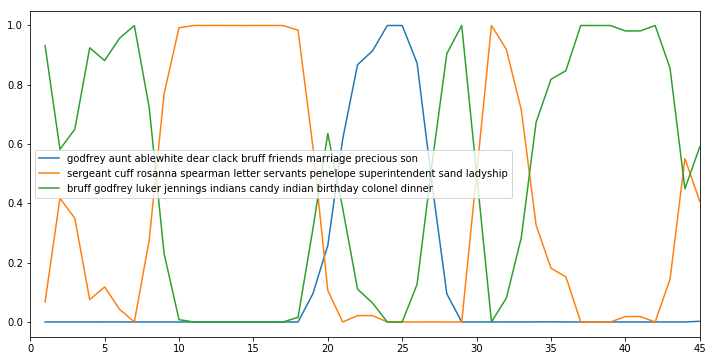

In [80]:
df[[topicLabels[0], topicLabels[1], topicLabels[2]]].rolling(2).mean().plot(figsize=(12,6))